검색어를 입력하세요: 수학
가져올 논문 수를 입력하세요: 5000


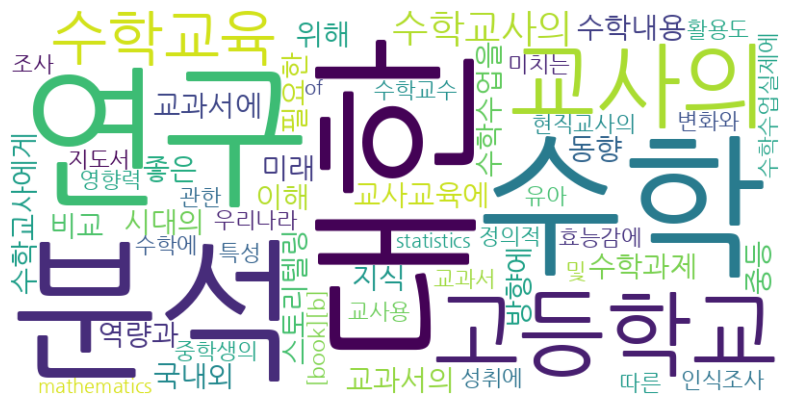

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
from collections import Counter

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

def get_keywords(query, max_papers=10):
    url = f"https://scholar.google.com/scholar?q={query}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    papers = soup.find_all('h3', class_='gs_rt')[:max_papers]
    keywords = []

    for paper in papers:
        paper_title = paper.text
        paper_keywords = [word.lower() for word in paper_title.split()]
        keywords.extend(paper_keywords)

    return keywords

def generate_wordcloud(keywords):
    # 워드 클라우드 생성
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate_from_frequencies(Counter(keywords))
    # 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    query = input("검색어를 입력하세요: ")
    max_papers = int(input("가져올 논문 수를 입력하세요: "))
    keywords = get_keywords(query, max_papers)
    generate_wordcloud(keywords)
